In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=dac5dadaff6774fde9642e73d414f459a90cce9b7d6ebfa8e6bcc443b5987560
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


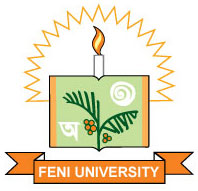
### <font color="midnightblue">**An In-Depth Analysis of algorithm on real estate data to generate a recommendation**</font>





      MORIUM AKTER CHOMPA      
           191031005
               &
        FARHANA ANJUMAN
           191031011
             


**UNDER SUPERVISION OF:**             
      
       MUHAMMAD ABU RAYAN
        LECTURER,CSE,FU
          
  **Department of CSE**

 **Feni University, [2023]**

 **Feni - 3900, Bangladesh**


In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import hvplot.pandas
import seaborn as sns
import warnings
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics, model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
!git clone https://github.com/FarhanaAnjuman/An-In-Depth-Analysis-of-algorithm-on-real-estate-data-to-generate-a-recommendation.git

Cloning into 'An-In-Depth-Analysis-of-algorithm-on-real-estate-data-to-generate-a-recommendation'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 155.58 KiB | 2.39 MiB/s, done.


In [ ]:
import pandas as pd
path ="/content/An-In-Depth-Analysis-of-algorithm-on-real-estate-data-to-generate-a-recommendation/BD_Housing - BD_Housing.csv"
df = pd.read_csv("/content/An-In-Depth-Analysis-of-algorithm-on-real-estate-data-to-generate-a-recommendation/BD_Housing - BD_Housing.csv")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import pandas as pd
#path ="/content/drive/MyDrive/BD_Housing - BD_Housing.csv"
#df = pd.read_csv("/content/drive/MyDrive/BD_Housing - BD_Housing.csv")

In [ ]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06


In [ ]:
len(df)

5000

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

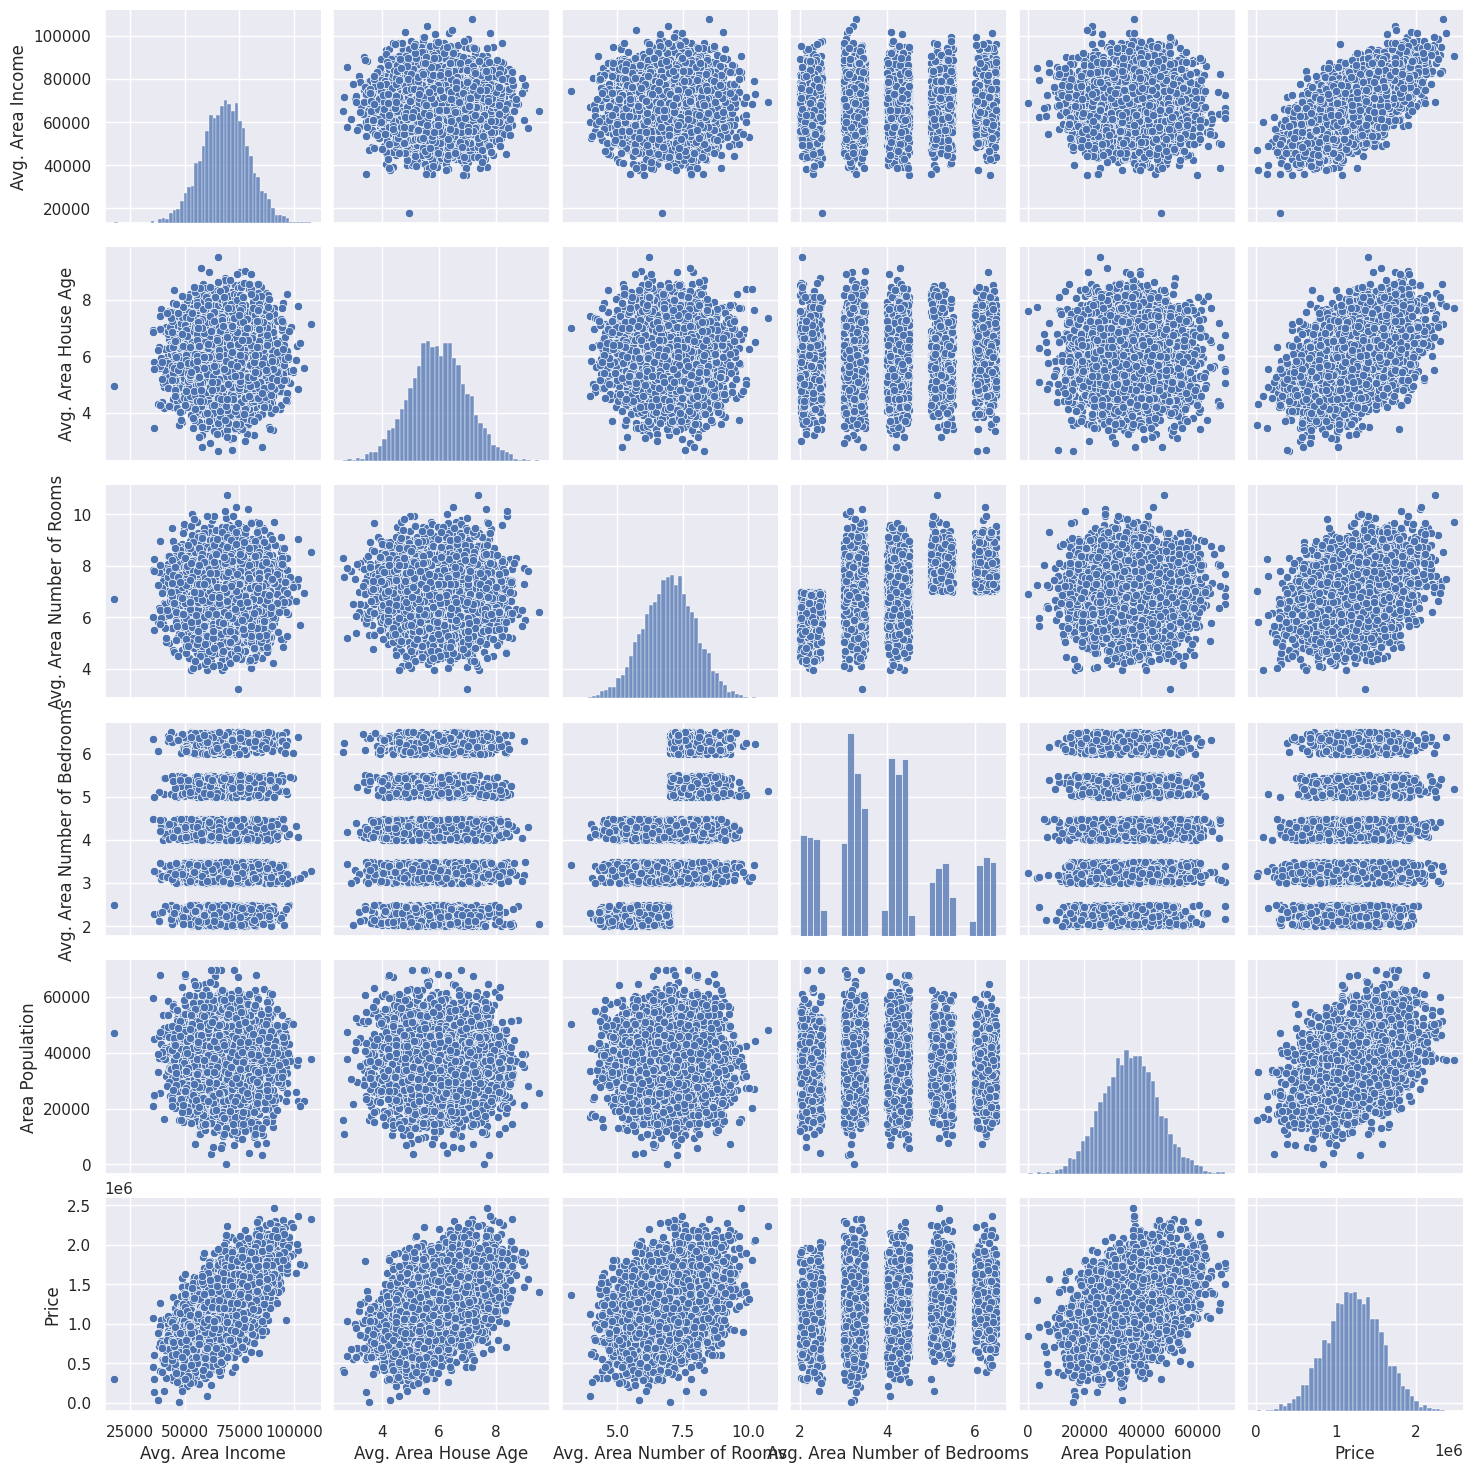

In [ ]:
sns.set(style="darkgrid")
sns.pairplot(df)

In [ ]:
df.hvplot.table(figsize=(10, 10), width=900, height=300, x='Price', subplots=True)

:Table   [Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price]

In [ ]:
df.hvplot.table("Price", width=900, height=300, figsize=(10, 10))

:Table   [Price]

In [ ]:
df.hvplot.table(x='Average Area House Age', y='Price', width=900, height=300, figsize=(10, 10))

:Table   [Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price]

In [ ]:
df.hvplot.table(x='Average Area Income', y='Price', width=900, height=300, figsize=(10, 10))

:Table   [Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price]

In [ ]:
list(df.columns)

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price']

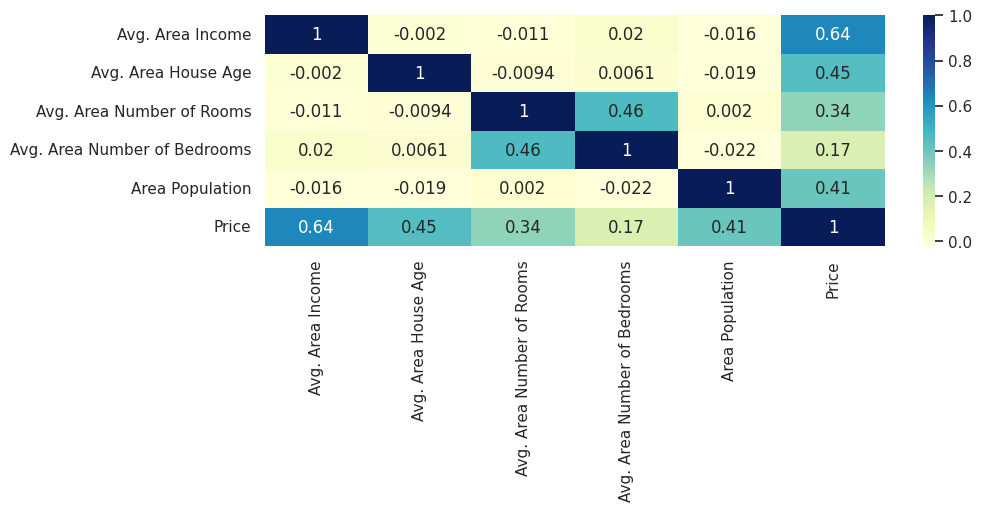

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10, 3),)
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3500, 1500, 3500, 1500)

In [ ]:
# cross validation
cross_val_score = model_selection.cross_val_score
def cross_val(model):
    scores = cross_val_score(model, X, y, cv=10)
    return np.mean(scores)

In [ ]:
# evaluate model
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
# model fitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [ ]:
intercept_value = lin_reg.intercept_
print(intercept_value)

1228219.149247


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724646
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555476
Avg. Area Number of Bedrooms,2892.815121
Area Population,151252.342376


In [ ]:
pred = lin_reg.predict(X_test)
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values', title='True Values vs. Predicted Values', color='blue')

:Scatter   [True Values]   (Predicted Values)

In [ ]:
pd.DataFrame({'Errors': y_test - pred}).hvplot.kde(title='KDE Plot of Error Values', xlabel='Error Values', color='red')

:Distribution   [Errors]   (Density)

In [ ]:
# predictions
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Test set evaluation:
MAE: 81135.56608241773
MSE: 10068422549.495707
RMSE: 100341.52953536091
R2 Square 0.9146818498916266
__________________________________
Train set evaluation:
MAE: 81480.49973197478
MSE: 10287043161.696651
RMSE: 101425.06180277462
R2 Square 0.9192986579053273
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566082,1.006842e+10,100341.529535,0.914682,0.917379


In [ ]:
model=RANSACRegressor(base_estimator=LinearRegression(),max_trials=100).fit(X_train,y_train)
# predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_1 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_1, ignore_index=True)
results_df_1

Test set evaluation:
MAE: 84137.96342268364
MSE: 11039633233.098103
RMSE: 105069.6589558475
R2 Square 0.9064519709326238
__________________________________
Train set evaluation:
MAE: 84784.1009180485
MSE: 11128440878.005665
RMSE: 105491.42561367566
R2 Square 0.912697934658208
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Robust Regression,84137.963423,1.103963e+10,105069.658956,0.906452,0.911956


In [ ]:
model=Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42).fit(X_train, y_train)
# predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

Test set evaluation:
MAE: 81428.64834618932
MSE: 10153269899.070402
RMSE: 100763.43532785295
R2 Square 0.9139628674619834
__________________________________
Train set evaluation:
MAE: 81972.39058593124
MSE: 10382929615.642656
RMSE: 101896.66145484187
R2 Square 0.9185464334419408
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Ridge Regression,81428.648346,1.015327e+10,100763.435328,0.913963,0.917379


In [ ]:
model=Lasso(alpha=0.1, precompute=True, warm_start=True, positive=True, selection='random', random_state=42).fit(X_train, y_train)
# predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_3 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df_3

Test set evaluation:
MAE: 81135.69850631114
MSE: 10068453388.459448
RMSE: 100341.68320523355
R2 Square 0.9146815885673403
__________________________________
Train set evaluation:
MAE: 81480.63002208095
MSE: 10287043197.133722
RMSE: 101425.06197747045
R2 Square 0.9192986576273252
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Lasso Regression,81135.698506,1.006845e+10,100341.683205,0.914682,0.917379


In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42).fit(X_train, y_train)
# predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_4 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df_4

Test set evaluation:
MAE: 81184.43146185702
MSE: 10078050166.595274
RMSE: 100389.49231167212
R2 Square 0.9146002670541118
__________________________________
Train set evaluation:
MAE: 81577.88831488302
MSE: 10299274948.600855
RMSE: 101485.3435161987
R2 Square 0.9192027001452723
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Elastic Net Regression,81184.431462,1.007805e+10,100389.492312,0.9146,0.879545


In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)
lin_reg = LinearRegression().fit(X_train_2_d, y_train)
# predictions
test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_5 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred), 0]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df_5

Test set evaluation:
MAE: 81174.51843037248
MSE: 10081983995.573215
RMSE: 100409.08323241088
R2 Square 0.914566932436937
__________________________________
Train set evaluation:
MAE: 81363.06185741002
MSE: 10266487151.52384
RMSE: 101323.67517773839
R2 Square 0.9194599187830141
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Polynomial Regression,81174.51843,1.008198e+10,100409.083232,0.914567,0


In [ ]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000).fit(X_train, y_train)
# predictions
test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_6 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df_6

Test set evaluation:
MAE: 81135.5637127775
MSE: 10068422568.233154
RMSE: 100341.52962872927
R2 Square 0.9146818497328486
__________________________________
Train set evaluation:
MAE: 81480.50068085868
MSE: 10287043161.78822
RMSE: 101425.06180322602
R2 Square 0.919298657904609
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Stochastic Gradient Descent,81135.563713,1.006842e+10,100341.529629,0.914682,0


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer=Adam(0.00001), loss='mse')
r=model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=1, epochs=100)

Epoch 1/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1635956686848.0000 - val_loss: 1658091995136.0000
Epoch 2/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1635132243968.0000 - val_loss: 1656038227968.0000
Epoch 3/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1630296473600.0000 - val_loss: 1647017590784.0000
Epoch 4/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1614226784256.0000 - val_loss: 1621200863232.0000
Epoch 5/100
3500/3500 [==============================] - 9s 3ms/step - loss: 1574260572160.0000 - val_loss: 1562434338816.0000
Epoch 6/100
3500/3500 [==============================] - 9s 3ms/step - loss: 1492033339392.0000 - val_loss: 1449410560000.0000
Epoch 7/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1343291523072.0000 - val_loss: 1256604303360.0000
Epoch 8/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1111224483840.0000 - val_loss: 975

In [ ]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values', title='True Values vs. Predicted Values', color='black')

:Scatter   [True Values]   (Predicted Values)

In [ ]:
pd.DataFrame(r.history)

,loss,val_loss
0,1.635957e+12,1.658092e+12
1,1.635132e+12,1.656038e+12
2,1.630296e+12,1.647018e+12
3,1.614227e+12,1.621201e+12
4,1.574261e+12,1.562434e+12
...,...,...
95,1.613468e+10,1.474524e+10
96,1.602386e+10,1.462202e+10
97,1.589584e+10,1.446368e+10
98,1.582085e+10,1.441959e+10


<Axes: >

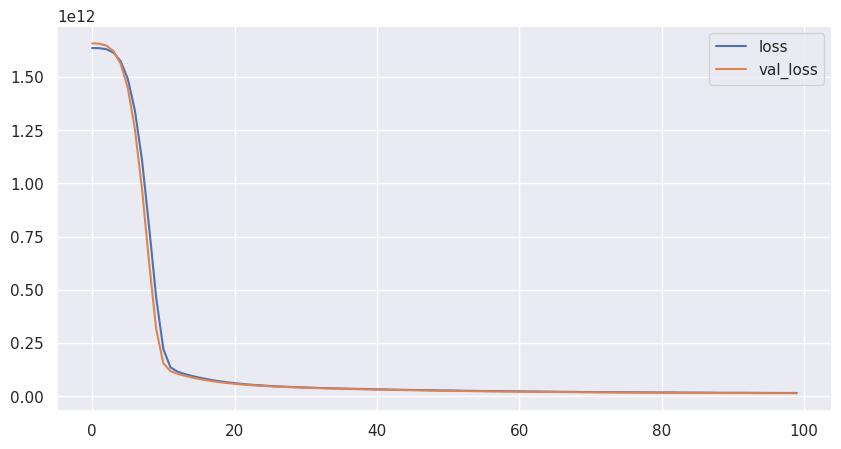

In [ ]:
pd.DataFrame(r.history).plot(figsize=(10,5))

In [ ]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'], title="Model Loss Over Time",
xlabel="Epoch", ylabel="Loss", grid=True, legend='right', width=900,line_color=['red','blue'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
# Predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_7 = pd.DataFrame(data=[["Tensorflow Keras", *evaluate(y_test, test_pred), 0]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_7, ignore_index=True)
results_df_7

110/110 [==============================] - 0s 2ms/step
Test set evaluation:
MAE: 92985.06938619999
MSE: 14264129426.45662
RMSE: 119432.53085510923
R2 Square 0.8791281226439343
__________________________________
Train set evaluation:
MAE: 95342.59931851427
MSE: 14908383249.86619
RMSE: 122099.89045804337
R2 Square 0.8830444747033114
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Tensorflow Keras,92985.069386,1.426413e+10,119432.530855,0.879128,0


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
# predictions
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_8 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_8, ignore_index=True)
results_df_8

Test set evaluation:
MAE: 93961.39769543368
MSE: 14062298916.31228
RMSE: 118584.56441001198
R2 Square 0.8808384010590775
__________________________________
Train set evaluation:
MAE: 35168.96844818074
MSE: 1974363970.8694482
RMSE: 44433.815623570394
R2 Square 0.9845112128210171
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regressor,93961.397695,1.406230e+10,118584.56441,0.880838,0


In [ ]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001).fit(X_train, y_train)
# predictions
test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_9=pd.DataFrame(data=[["Support Vector Machine", *evaluate(y_test, test_pred), 0]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df=results_df.append(results_df_9, ignore_index=True)
results_df_9

Test set evaluation:
MAE: 87205.734901903
MSE: 11720934328.71862
RMSE: 108263.26398515159
R2 Square 0.9006787379500587
__________________________________
Train set evaluation:
MAE: 73692.56808322907
MSE: 9363827892.445122
RMSE: 96766.8739416807
R2 Square 0.9265412357870171
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Support Vector Machine,87205.734902,1.172093e+10,108263.263985,0.900679,0


In [ ]:
model = PLSRegression(n_components=2).fit(X_train, y_train)
# make predictions on test and train data
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# evaluate model
print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
# create results dataframe
results_df_10=pd.DataFrame(data=[["Partial Least Squares Regression", *evaluate(y_test, test_pred), 0]],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df=results_df.append(results_df_10, ignore_index=True)
results_df_10

Test set evaluation:
MAE: 82577.7935068275
MSE: 10580702054.884455
RMSE: 102862.53960934687
R2 Square 0.9103408779545291
__________________________________
Train set evaluation:
MAE: 83232.8741700542
MSE: 10680309674.790068
RMSE: 103345.58372175401
R2 Square 0.9162135016647369
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Partial Least Squares Regression,82577.793507,1.058070e+10,102862.539609,0.910341,0


In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566082,1.006842e+10,100341.529535,0.914682,0.917379
1,Robust Regression,84137.963423,1.103963e+10,105069.658956,0.906452,0.911956
2,Ridge Regression,81428.648346,1.015327e+10,100763.435328,0.913963,0.917379
3,Lasso Regression,81135.698506,1.006845e+10,100341.683205,0.914682,0.917379
4,Elastic Net Regression,81184.431462,1.007805e+10,100389.492312,0.914600,0.879545
5,Polynomial Regression,81174.518430,1.008198e+10,100409.083232,0.914567,0.000000
6,Stochastic Gradient Descent,81135.563713,1.006842e+10,100341.529629,0.914682,0.000000
7,Tensorflow Keras,92985.069386,1.426413e+10,119432.530855,0.879128,0.000000
8,Random Forest Regressor,93961.397695,1.406230e+10,118584.564410,0.880838,0.000000
9,Support Vector Machine,87205.734902,1.172093e+10,108263.263985,0.900679,0.000000


In [ ]:
# Combined dataframe to view all results
combined_results_df = pd.concat([results_df, results_df_1, results_df_2, results_df_3, results_df_4, results_df_5, results_df_6, results_df_7, results_df_8, results_df_9, results_df_10], ignore_index=True, sort=False)
combined_results_df = combined_results_df.drop_duplicates()
# Sort R2 square values
combined_results_df.sort_values(by=['R2 Square'], ascending=True)

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
7,Tensorflow Keras,92985.069386,1.426413e+10,119432.530855,0.879128,0.000000
8,Random Forest Regressor,93961.397695,1.406230e+10,118584.564410,0.880838,0.000000
9,Support Vector Machine,87205.734902,1.172093e+10,108263.263985,0.900679,0.000000
1,Robust Regression,84137.963423,1.103963e+10,105069.658956,0.906452,0.911956
10,Partial Least Squares Regression,82577.793507,1.058070e+10,102862.539609,0.910341,0.000000
2,Ridge Regression,81428.648346,1.015327e+10,100763.435328,0.913963,0.917379
5,Polynomial Regression,81174.518430,1.008198e+10,100409.083232,0.914567,0.000000
4,Elastic Net Regression,81184.431462,1.007805e+10,100389.492312,0.914600,0.879545
3,Lasso Regression,81135.698506,1.006845e+10,100341.683205,0.914682,0.917379
6,Stochastic Gradient Descent,81135.563713,1.006842e+10,100341.529629,0.914682,0.000000


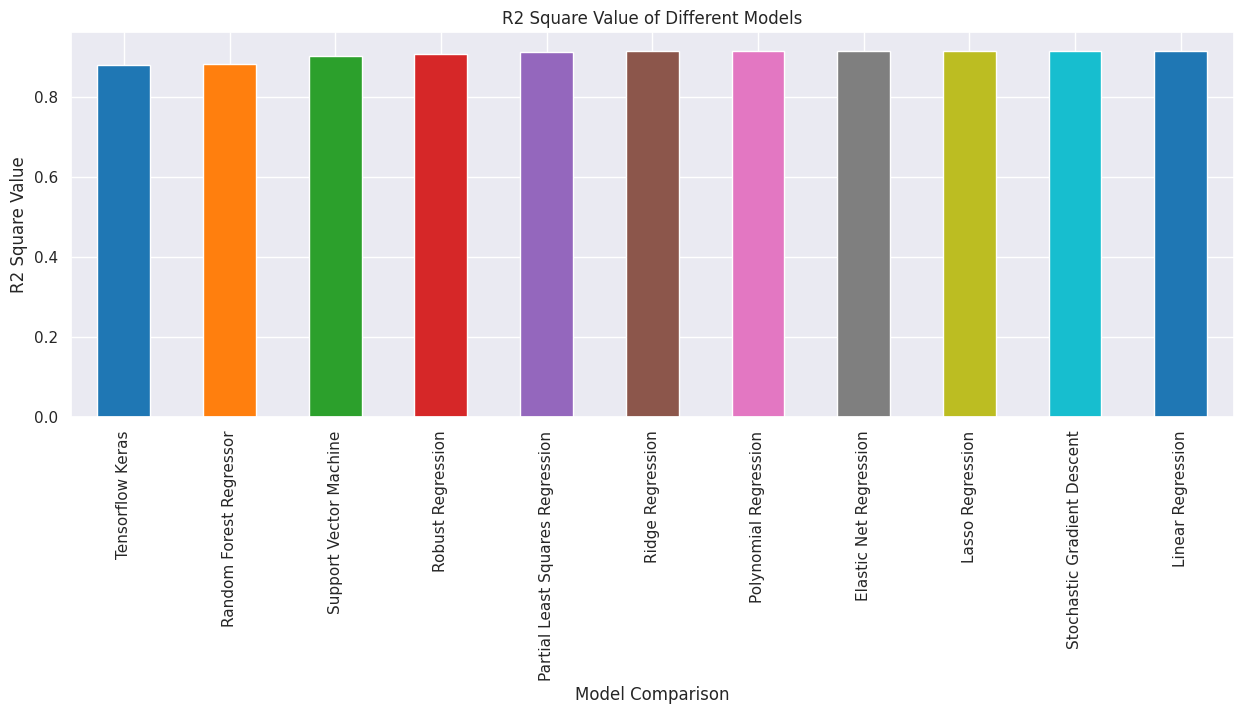

In [ ]:
# combined dataframe to view all results
combined_results_df = pd.concat([results_df, results_df_1, results_df_2, results_df_3, results_df_4, results_df_5, results_df_6, results_df_7, results_df_8, results_df_9, results_df_10], ignore_index=True, sort=False)
combined_results_df = combined_results_df.drop_duplicates()
# Sort R2 square values
combined_results_df.sort_values(by=['R2 Square'], ascending=False)
# Color gradient
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())
# Graph
combined_results_df.sort_values(by=['R2 Square'], ascending=True).plot.bar(x='Model', y='R2 Square', color=colors, figsize=(15,5), legend=False);
plt.title('R2 Square Value of Different Models')
plt.xlabel('Model Comparison')
plt.ylabel('R2 Square Value')
#plt.savefig('models/Model Comparison.png', dpi= 300, bbox_inches='tight')
plt.show()

In [ ]:
# Top 3 results
combined_results_df.sort_values(by=['R2 Square'], ascending=False).head(3)

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566082,1.006842e+10,100341.529535,0.914682,0.917379
6,Stochastic Gradient Descent,81135.563713,1.006842e+10,100341.529629,0.914682,0.000000
3,Lasso Regression,81135.698506,1.006845e+10,100341.683205,0.914682,0.917379


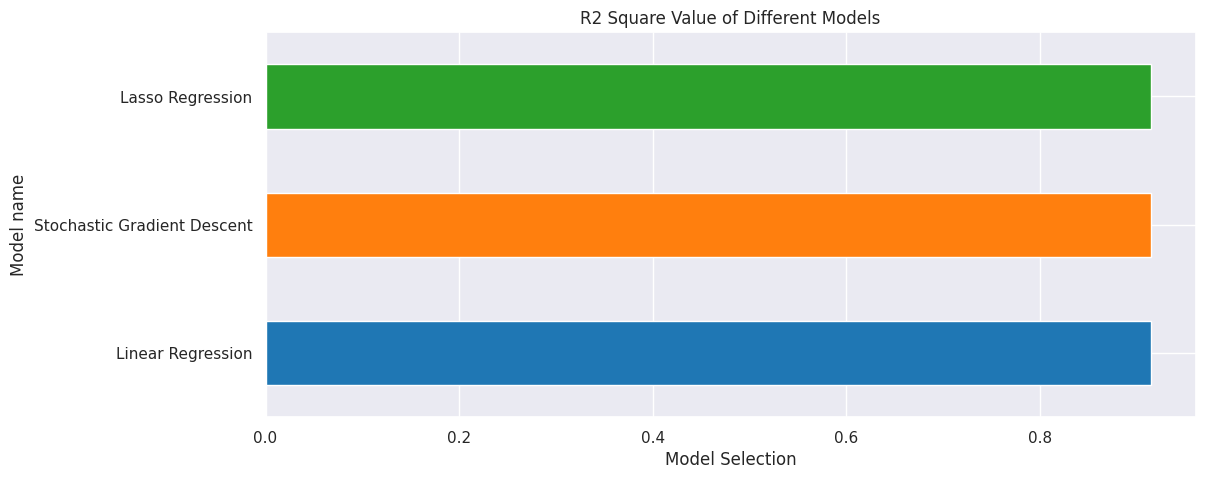

In [ ]:
# combined dataframe to view all results
combined_results_df = pd.concat([results_df, results_df_1, results_df_2,
results_df_3, results_df_4, results_df_5, results_df_6, results_df_7,
results_df_8, results_df_9, results_df_10], ignore_index=True, sort=False)
combined_results_df = combined_results_df.drop_duplicates()
# Sort R2 square values
combined_results_df.sort_values(by=['R2 Square'], ascending=False)
# Color gradient
colors = list(mcolors.TABLEAU_COLORS.values())
# Graph
combined_results_df.sort_values(by=['R2 Square'],
ascending=False).head(3).plot.barh(x='Model',
y='R2 Square', color=colors, figsize=(12,5), legend=False);
plt.title('R2 Square Value of Different Models')
plt.xlabel('Model Selection')
plt.ylabel('Model name')
#plt.savefig('models/Top 3 model with highest accuracy.png', dpi= 300, bbox_inches='tight')
plt.show()

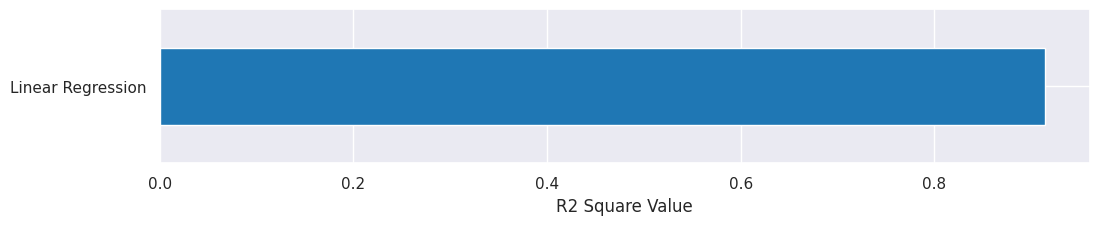

In [ ]:
# Color gradient
colors = list(mcolors.TABLEAU_COLORS.values())
# Graph
combined_results_df.sort_values(by=['R2 Square'], ascending=False).head(1).plot.barh(x='Model', y='R2 Square', color=colors, figsize=(12,2), legend=False);
plt.title('')
plt.xlabel('R2 Square Value')
plt.ylabel('')
#plt.savefig('models/Our final model.png', dpi= 300, bbox_inches='tight')
plt.show()

In [ ]:
#model.save(os.path.join("models", "Research.h5"))

In [ ]:
#with open('models/Linear Model.pkl','wb') as f:
#pickle.dump(model,f)